### Desafío - MAQUINAS DE SOPORTE VECTORIAL
#### CAMILA VERA VILLA
#### SEPTIEMBRE  02

### Descripción
Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria.


### Ejercicio 1: Preparar el ambiente de trabajo
* Importe todas las librerías a utilizar.
* Fije los parámetros de los gráficos con plt.Rcparams.
* Excluya las columnas id y Unnamed: 32 de la base de datos.
* Recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente.

In [26]:
# librerias clasicas
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# librerias para graficar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(12, 10)

In [27]:
#carga dataset y exclusion de columnas
df= pd.read_csv("breast_cancer.csv").drop(['id','Unnamed: 32'],axis=1)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [28]:
df.shape

(569, 31)

In [29]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
# Recodificacion del vector objetivo diagnosis a numérico 

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Ejercicio 2: Visualizando la distribución de los atributos
* Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
* Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

In [32]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
#quitar vector objetivo
df2 = df.drop(columns = 'diagnosis')

In [34]:
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


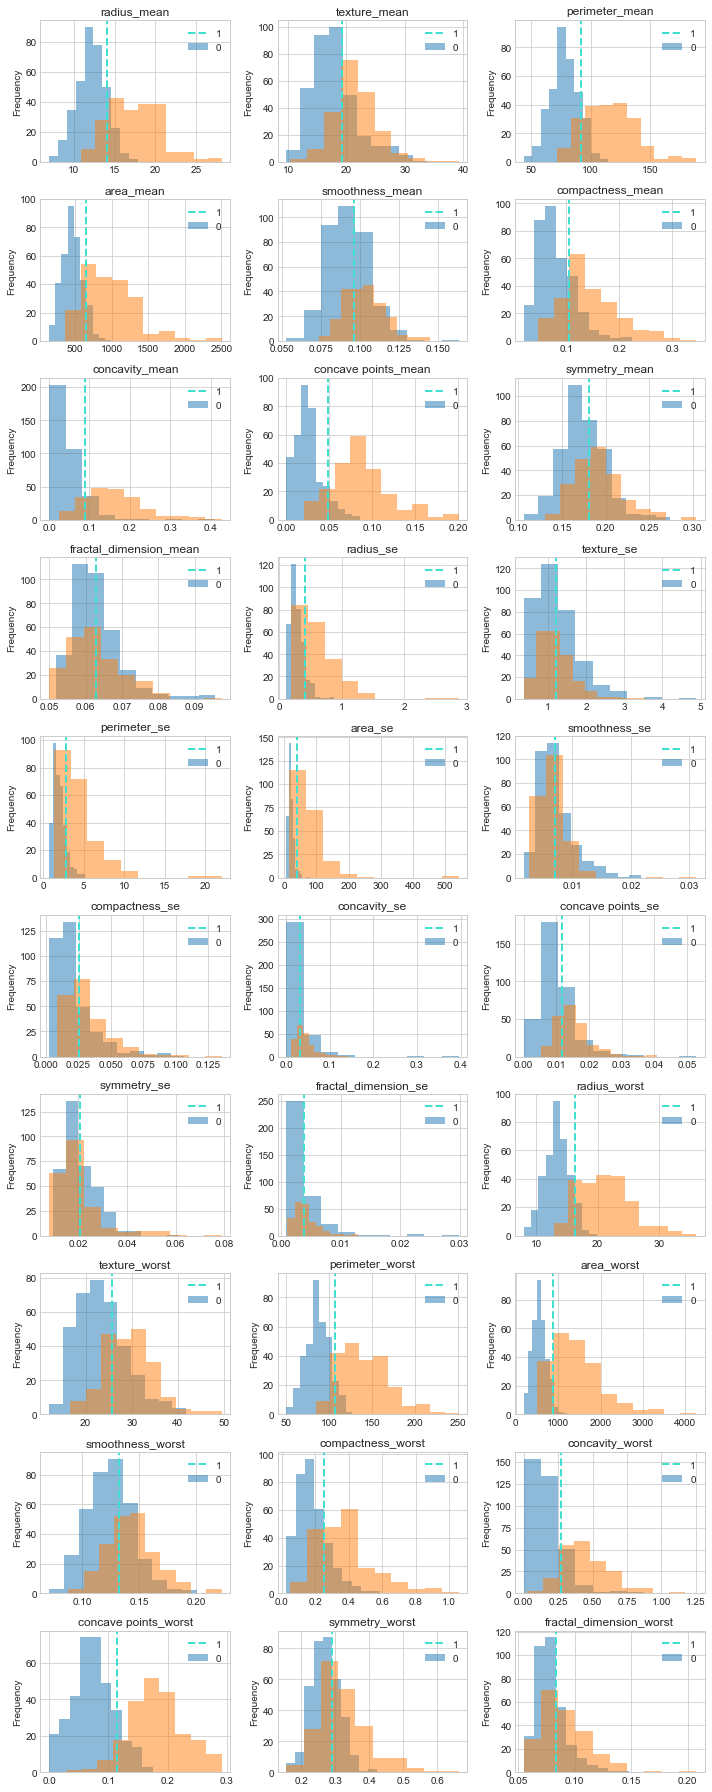

In [35]:
plt.figure(figsize=(10, 25))
#col_mean = (df.drop(columns = 'diagnosis').columns).mean()

for n, i in enumerate (df2.columns):
    plt.subplot(10, 3, n + 1)
    df.groupby('diagnosis')[i].plot(kind='hist', alpha=.5)
    plt.axvline(df[i].mean(), color = "turquoise", linestyle = "--", lw = 2)
    plt.legend(df['diagnosis'].unique())
    plt.title(i)
    plt.tight_layout()

	INFO DE LOS ATRIBUTOS
    
    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

### Ejercicio 3: Estimando el porcentaje de overlap en los atributos
* Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
* El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

```python
def histogram_overlap(df, attribute, target, perc=100):
# get lower bound
empirical_lower_bound = np.floor(df[attribute].min())
# get upper bound
empirical_upper_bound = np.ceil(df[attribute].max())
# preserve histograms
tmp_hist_holder = dict()
# for each target class
for unique_value in np.unique(df[target]):
# get histogram
tmp, _ = np.histogram(
# for a specific attribute
df[df[target] == unique_value][attribute],
# define percentage
bins=perc,
# limit empirical range for comparison
range=[empirical_lower_bound, empirical_upper_bound]
)
# append to dict
tmp_hist_holder["h_"+str(unique_value)] = tmp
get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
intersection = np.true_divide(np.sum(get_minima),
np.sum(tmp_hist_holder["h_-1"]))
return intersection
```

* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
* Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.


```python
def histogram_overlap(df, attribute, target, perc=100):
   # get lower bound
   empirical_lower_bound = np.floor(df[attribute].min())
   # get upper bound
   empirical_upper_bound = np.ceil(df[attribute].max())
   # preserve histograms
   tmp_hist_holder = dict()
   # for each target class
   for unique_value in np.unique(df[target]):
       # get histogram
       tmp, _ = np.histogram(
       # for a specific attribute
       df[df[target] == unique_value][attribute],
       # define percentage
       bins=perc,
       # limit empirical range for comparison
       range=[empirical_lower_bound, empirical_upper_bound]
       )
   # append to dict
   tmp_hist_holder["h_"+str(unique_value)] = tmp
   get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
   intersection = np.true_divide(np.sum(get_minima),
   np.sum(tmp_hist_holder["h_0"]))
   return intersection
```

In [36]:
#FUNCION MEJORADA
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound]
        )
    # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))
    return intersection

In [37]:
df2.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
def p_overlap(df, col_obj):
    df_1 = df.loc[df[col_obj] ==1]
    df_0 = df.loc[df[col_obj] ==0]
    del df_1[col_obj]
    del df_0[col_obj]
    result_1 = []
    result_0 = []
    for col in df_1.columns:
        h1, _ = np.histogram(df_1[col],bins=100)
        result_1.append(h1)
    for col in df_0.columns:
        h0, _ = np.histogram(df_0[col],bins=100)
        result_0.append(h0)
    inter=[]
    for n,l in zip(result_1,result_0):
        get_minima = np.minimum(n,l)
        intersection = np.true_divide(np.sum(get_minima), np.sum(l))
        inter.append(round(intersection,4)*100)
    df_porc = pd.DataFrame({"att": df_1.columns, "%": inter})
    df_porc_sort = df_porc.sort_values(by='%', ascending=False)
    print(df_porc_sort.shape)


In [39]:
df_clean = df.dropna()

In [40]:
columnas = []
overlap = []
target = 'diagnosis'

for col in df2.columns:
    columnas.append(col)
    overlap.append(histogram_overlap(df, col, target))

valores ={'atributos': columnas, 'overlap':overlap}
df_nuevo = pd.DataFrame(valores).sort_values(by="overlap", ascending=False).reset_index(drop=True)      
df_nuevo


,atributos,overlap
0,fractal_dimension_se,0.593838
1,smoothness_se,0.591036
2,fractal_dimension_mean,0.588235
3,symmetry_se,0.568627
4,texture_se,0.549020
5,compactness_se,0.523810
6,smoothness_mean,0.521008
7,symmetry_mean,0.509804
8,concave points_se,0.507003
9,fractal_dimension_worst,0.492997


### Ejercicio 4: Selección del modelo por GridSearchCV
* Entrene una serie de modelos SVC con los siguientes hiperparámetros:
    * **C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] .**
    * **gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10] .**
* Validaciones cruzadas: 10.
* Genere un heatmap en base a los puntajes estimados con GridSearchCV .
* tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_ .

**Digresión: Un par de elementos a considerar en la implementación de GridSearchCV**

* Si trabajamos con sklearn.model_selection.GridSearchCV, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos X_train y y_train a nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación externa.
* Si tenemos un archivo de testing externo, se recomienda no hacer división.
* El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma funcionalidad de cualquier método de estimación de scikit-learn , con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
     * sklearn.model_selection.GridSearchCV.cv_results_ devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo:
    * split* Indicará la métrica específica en cada validacieon cruzada y combinación de hiperparámetros.
    * *_time Indicará el tiempo de ejecución en cada modelo.

* Por lo general trabajaremos con mean_test_score y mean_train_score que representa la media de CV para cada combinación de hiperparámetros.
* sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros. 
* sklearn.model_selection.GridSearchCV.best_score_ devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá Accuracy , si es un problema de regresión devolverá MSE .

* Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente.
* Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

In [41]:
#estandarizar la matriz de atributos
x_scaled =StandardScaler().fit_transform(df2)

#conjuntos de entrenamiento y validacion
x_train, x_test, y_train, y_test = train_test_split(x_scaled, df['diagnosis'], random_state = 25, test_size = .33)

#rango de C
c_param =  [0.0001,0.001,0.01,0.1,1,10,100,1000] 
#rango de gamma
gamma_param = [0.0000001,0.0001,0.001,0.01,0.1,1,10]


In [42]:
#busqueda de grilla
search_params = {'C' : [0.0001,0.001,0.01,0.1,1,10,100,1000],
                 'gamma' : [0.0000001,0.0001,0.001,0.01,0.1,1,10]}

model_svc = GridSearchCV(SVC(kernel = 'rbf'),search_params, cv =10)
model_svc.fit(x_train, y_train)

#devuelve los mejores resultados para los hiperparametros ingresados
print('*En estos rangos de C y gamma el modelo presenta un desempeno eficiente: {}'.format(model_svc.best_params_))

#devuelve el desempeño promedio del modelo en el testing interno. 
print('* Mejor desempeno de la muestra de entrenamiento: {}'.format (model_svc.best_score_))


*En estos rangos de C y gamma el modelo presenta un desempeno eficiente: {'C': 100, 'gamma': 0.01}
* Mejor desempeno de la muestra de entrenamiento: 0.979002624671916


In [43]:
#devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
print('* best estimator: {}'.format(model_svc.best_estimator_))

* best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [44]:
print(model_svc.cv_results_)

{'mean_fit_time': array([0.01197824, 0.00937252, 0.01093485, 0.00973172, 0.00780978,
       0.01093421, 0.01535358, 0.00781007, 0.00931556, 0.00781059,
       0.00718739, 0.00973752, 0.01015441, 0.01488283, 0.0126255 ,
       0.00951159, 0.01093481, 0.01258116, 0.00963907, 0.00468652,
       0.01576052, 0.01105142, 0.00952749, 0.01093431, 0.00624857,
       0.00937099, 0.01586702, 0.01607835, 0.01232927, 0.00707128,
       0.00312426, 0.00468643, 0.00468612, 0.00645587, 0.01194434,
       0.00885384, 0.00625846, 0.00156212, 0.00156238, 0.00624835,
       0.0166095 , 0.01423256, 0.00938292, 0.00313952, 0.00224864,
       0.00324063, 0.00638549, 0.01264617, 0.01562164, 0.00787349,
       0.00156209, 0.00156224, 0.00312517, 0.00781069, 0.0102159 ,
       0.01563299]), 'std_fit_time': array([4.48540932e-03, 7.65263099e-03, 7.15854224e-03, 7.11779934e-03,
       7.80978234e-03, 7.15812323e-03, 1.73491338e-03, 7.81006880e-03,
       5.92622721e-03, 7.81059284e-03, 5.29841220e-03, 7.99555853e

In [45]:
print('* mean test score: {}'.format(model_svc.cv_results_['mean_test_score']))

* mean test score: [0.60629921 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921
 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921
 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921
 0.60629921 0.60629921 0.60629921 0.60629921 0.60629921 0.72440945
 0.94750656 0.93963255 0.60629921 0.60629921 0.60629921 0.72703412
 0.94750656 0.96587927 0.95275591 0.60629921 0.60629921 0.60629921
 0.94750656 0.96587927 0.97375328 0.95275591 0.61417323 0.60629921
 0.60629921 0.96587927 0.96850394 0.97900262 0.95275591 0.61417323
 0.60629921 0.72965879 0.97375328 0.97637795 0.97637795 0.95275591
 0.61417323 0.60629921]


In [46]:
# diccionario para guardar la combinacion de hiperparametros y su desempeno
empty_dict = {}

#mejor puntaje
best_score = 0

#lista para guardar la iteracion del 1er hiperparametro
c_holder = []

for c in c_param:
    # iniciamos una lista para capturar la iteración del 2do parámetro
    gamma_holder = []
    
    # para cada valor en el segundo rango
    for gamma in gamma_param:
        tmp_score = cross_val_score(SVC(C=c, gamma=gamma),
                    # validamos de forma cruzada con el conjunto de entrenamiento
                    x_train, y_train, cv=10, n_jobs=-1)

        # generamos una llave col la combinación de parámetros y la lista de desempeño validada de forma cruzada
        empty_dict[str("C: {}, Gamma: {}".format(c, gamma))] = list(tmp_score)

        # Agregamos a cada lista secundaria el promedio de validación cruzada
        gamma_holder.append(np.mean(tmp_score))

        # si la media es mejor que el mejor puntaje registrado
        if np.mean(tmp_score) > best_score:
            best_score = np.mean(tmp_score)
            # extraemos el string asociado a la combinación de valores
            best_params = str("C: {}, Gamma: {}".format(c, gamma))
    # adjuntamos la lista secundaria de cada valor a la primaria.
    c_holder.append(gamma_holder)
# redimensionamos a una matriz
cv_params = np.array(c_holder).reshape(7, 8)

In [47]:
plt.figure(figsize=(12, 12))
sns.heatmap(model_svc.cv_results_['mean_test_score'], annot=True, cmap='Greens',
            cbar=False, xticklabels=gamma,yticklabels=C, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

NameError: name 'C' is not defined

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(cv_params, annot=True, cmap='Greens',
            cbar=False, xticklabels=gamma,yticklabels=C, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

El heatmap muestra una exactitud de 0.979

### Ejercicio 5: Validación del modelo en el hold-out sample
* Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
* Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. 
* Comente en qué casos el modelo presenta un desempeño deficiente

In [ ]:
#devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
print('* best estimator: {}'.format(model_svc.best_estimator_))

In [ ]:
best_estimator_svcmodel = model_svc.best_estimator_.fit(x_train,y_train)
print(classification_report(y_test, best_estimator_svcmodel.predict(x_test)))

                                                            ***